In [151]:
# Import dependencies:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# Read in crime csv:
crime_file = "nypd_crime.csv"
crime_df = pd.read_csv(crime_file)

# Take a look:
crime_df.head(10)

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,942919936,77,NaN,06/29/2020,18:10:00,NaN,NaN,COMPLETED,WEEKSVILLE GARDENS,NaN,...,NaN,18-24,BLACK,M,1002388,185584,40.676052,-73.934611,"(40.676051596000036, -73.93461108799994)",POINT (-73.93461108799994 40.676051596000036)
1,444710066,60,NaN,06/20/2020,13:52:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,<18,BLACK,M,984147,150278,40.579163,-74.000372,"(40.57916262500004, -74.00037223199998)",POINT (-74.00037223199998 40.57916262500004)
2,121536456,47,NaN,06/12/2020,23:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,18-24,BLACK,F,1021731,263219,40.889078,-73.864443,"(40.88907795500006, -73.86444348399993)",POINT (-73.86444348399993 40.88907795500006)
3,314830920,75,NaN,06/05/2020,20:20:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1013511,181454,40.664686,-73.894529,"(40.66468589900006, -73.89452887499993)",POINT (-73.89452887499993 40.66468589900006)
4,173858725,101,NaN,06/05/2020,19:20:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1053494,161530,40.609777,-73.750613,"(40.60977656700004, -73.75061339299998)",POINT (-73.75061339299998 40.60977656700004)
5,859565694,48,NaN,06/05/2020,00:07:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,18-24,BLACK,M,1016042,249486,40.851407,-73.885084,"(40.85140742400005, -73.88508408799999)",POINT (-73.88508408799999 40.85140742400005)
6,756614793,75,NaN,05/28/2020,23:53:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1012206,180039,40.660806,-73.899239,"(40.66080625500007, -73.89923866699996)",POINT (-73.89923866699996 40.66080625500007)
7,237202728,75,BROOKLYN,05/16/2020,17:56:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,E,1020007,189768,40.687482,-73.871070,"(40.68748208300008, -73.871069677)",POINT (-73.871069677 40.68748208300008)
8,517518318,77,NaN,05/05/2020,22:31:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,998527,185573,40.676028,-73.948531,"(40.67602847200004, -73.94853062299995)",POINT (-73.94853062299995 40.67602847200004)
9,354783980,73,NaN,04/19/2020,14:50:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,M,1009004,180575,40.662287,-73.910778,"(40.66228698700007, -73.91077776999998)",POINT (-73.91077776999998 40.66228698700007)


In [36]:
#Cleaning data; remove unneeded columns, rename to words:

cleaning_df = pd.DataFrame(crime_df[["ADDR_PCT_CD", "CMPLNT_NUM", "BORO_NM", "LAW_CAT_CD"]])
cleaning_df = cleaning_df.rename(columns = {"ADDR_PCT_CD": "Precinct", "CMPLNT_NUM": "Complaint Number", "BORO_NM": "Borough", 
                                           "LAW_CAT_CD": "Category",})
cleaning_df.head(10)

,Precinct,Complaint Number,Borough,Category
0,77,942919936,NaN,FELONY
1,60,444710066,NaN,FELONY
2,47,121536456,NaN,FELONY
3,75,314830920,NaN,FELONY
4,101,173858725,NaN,FELONY
5,48,859565694,NaN,FELONY
6,75,756614793,NaN,FELONY
7,75,237202728,BROOKLYN,FELONY
8,77,517518318,NaN,FELONY
9,73,354783980,NaN,FELONY


In [37]:
# Loop through the crime data and translate the jurisdiction number into a zip code, based those listed on 
# NYPD's website for the 77 jurisdictions:

zip_codes = []

for value in cleaning_df["Precinct"]:
    if value == 1:
        zip = 10013
    if value == 5:
        zip = 10013
    if value == 6:
        zip = 10014
    if value == 7:
        zip = 10002
    if value == 9:
        zip = 10003
    if value == 10:
        zip = 10011
    if value == 13:
        zip = 10010
    if value == 14:
        zip = 10001
    if value == 17:
        zip = 10022
    if value == 18:
        zip = 10019
    if value == 19:
        zip = 10065
    if value == 20:
        zip = 10024
    if value == 22:
        zip = 10024
    if value == 23:
        zip = 10029
    if value == 24:
        zip = 10025
    if value == 25:
        zip = 10035
    if value == 26:
        zip = 10027
    if value == 28:
        zip = 10027
    if value == 30:
        zip = 10031
    if value == 32:
        zip = 10030
    if value == 33:
        zip = 10032
    if value == 34:
        zip = 10033
    if value == 40:
        zip = 10454
    if value == 41:
        zip = 10459
    if value == 42:
        zip = 10451
    if value == 43:
        zip = 10473
    if value == 44:
        zip = 10452
    if value == 45:
        zip = 10465
    if value == 46:
        zip = 10457
    if value == 47:
        zip = 10466
    if value == 48:
        zip = 10457
    if value == 49:
        zip = 10461
    if value == 50:
        zip = 10463
    if value == 52:
        zip = 10467
    if value == 60:
        zip = 11224
    if value == 61:
        zip = 11223
    if value == 62:
        zip = 11214
    if value == 63:
        zip = 11210
    if value == 66:
        zip = 11204
    if value == 67:
        zip = 11226
    if value == 68:
        zip = 11236
    if value == 69:
        zip = 11236
    if value == 70:
        zip = 11230
    if value == 71:
        zip = 11225
    if value == 72:
        zip = 11232
    if value == 73:
        zip = 11212
    if value == 75:
        zip = 11208
    if value == 76:
        zip = 11231
    if value == 77:
        zip = 11213
    if value == 78:
        zip = 11217
    if value == 79:
        zip = 11216
    if value == 81:
        zip = 11221
    if value == 83:
        zip = 11237
    if value == 84:
        zip = 11201
    if value == 88:
        zip = 11205
    if value == 90:
        zip = 11211
    if value == 94:
        zip = 11222
    if value == 100:
        zip = 11693
    if value == 101:
        zip = 11691
    if value == 102:
        zip = 11418
    if value == 103:
        zip = 11432
    if value == 104:
        zip = 11385
    if value == 105:
        zip = 11428
    if value == 106:
        zip = 11417
    if value == 107:
        zip = 11365
    if value == 108:
        zip = 11101
    if value == 109:
        zip = 11354
    if value == 110:
        zip = 11373
    if value == 111:
        zip = 11361
    if value == 112:
        zip = 11375
    if value == 113:
        zip = 11434
    if value == 114:
        zip = 11103
    if value == 115:
        zip = 11372
    if value == 120:
        zip = 10301
    if value == 121:
        zip = 10314
    if value == 122:
        zip = 10306
    if value == 123:
        zip = 10307
    zip_codes.append(zip)



In [38]:
len(zip_codes)

196853

In [39]:
cleaning_df["Zip"] = zip_codes

In [40]:
cleaning_df.head(10)

,Precinct,Complaint Number,Borough,Category,Zip
0,77,942919936,NaN,FELONY,11213
1,60,444710066,NaN,FELONY,11224
2,47,121536456,NaN,FELONY,10466
3,75,314830920,NaN,FELONY,11208
4,101,173858725,NaN,FELONY,11691
5,48,859565694,NaN,FELONY,10457
6,75,756614793,NaN,FELONY,11208
7,75,237202728,BROOKLYN,FELONY,11208
8,77,517518318,NaN,FELONY,11213
9,73,354783980,NaN,FELONY,11212


In [41]:
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196853 entries, 0 to 196852
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Precinct          196853 non-null  int64 
 1   Complaint Number  196853 non-null  int64 
 2   Borough           196658 non-null  object
 3   Category          196853 non-null  object
 4   Zip               196853 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.5+ MB


In [42]:
# Drop rows with NaN values:
cleaning_df.dropna(inplace=True)


In [43]:
cleaning_df.head(10)

,Precinct,Complaint Number,Borough,Category,Zip
7,75,237202728,BROOKLYN,FELONY,11208
10,13,989134472,MANHATTAN,FELONY,10010
24,1,681808925,MANHATTAN,FELONY,10013
26,73,170101826,BROOKLYN,MISDEMEANOR,11212
27,103,817418587,QUEENS,MISDEMEANOR,11432
28,113,736247900,QUEENS,MISDEMEANOR,11434
29,109,722434037,QUEENS,FELONY,11354
30,73,240329077,BROOKLYN,VIOLATION,11212
31,40,807604372,BRONX,MISDEMEANOR,10454
32,61,766630185,BROOKLYN,MISDEMEANOR,11223


In [44]:
# Reset index after NaN rows were dropped:

cleaning_df.reset_index(drop=True, inplace=True)


In [45]:
cleaning_df.head()

,Precinct,Complaint Number,Borough,Category,Zip
0,75,237202728,BROOKLYN,FELONY,11208
1,13,989134472,MANHATTAN,FELONY,10010
2,1,681808925,MANHATTAN,FELONY,10013
3,73,170101826,BROOKLYN,MISDEMEANOR,11212
4,103,817418587,QUEENS,MISDEMEANOR,11432


In [46]:
# Save output:
cleaning_df.to_csv("Resources/crimes_by_zip.csv")

In [49]:
# Start new code here by zip code:

total_zip_crimes = cleaning_df.Zip.value_counts()
total_zip_crimes
zips = total_zip_crimes.index
zips

#total_borough_crimes = cleaning_df.Borough.value_counts()
#total_borough_crimes
#boroughs=total_borough_crimes.index
#boroughs


Int64Index([10457, 11208, 10454, 10452, 10473, 10466, 10013, 10467, 10451,
            11212, 11103, 11216, 11236, 11354, 11226, 11428, 10065, 11372,
            10027, 11434, 10001, 11432, 11230, 11237, 10035, 11373, 11385,
            10301, 10010, 10461, 10029, 11213, 10019, 11211, 11224, 11417,
            10030, 10465, 10033, 10459, 11418, 11221, 10314, 11223, 10014,
            11225, 11365, 11232, 11214, 11691, 11101, 10003, 10463, 10306,
            10025, 11205, 11201, 10031, 10032, 10002, 11204, 11210, 10011,
            10024, 11217, 11222, 10022, 11375, 11693, 11361, 10307, 11231],
           dtype='int64')

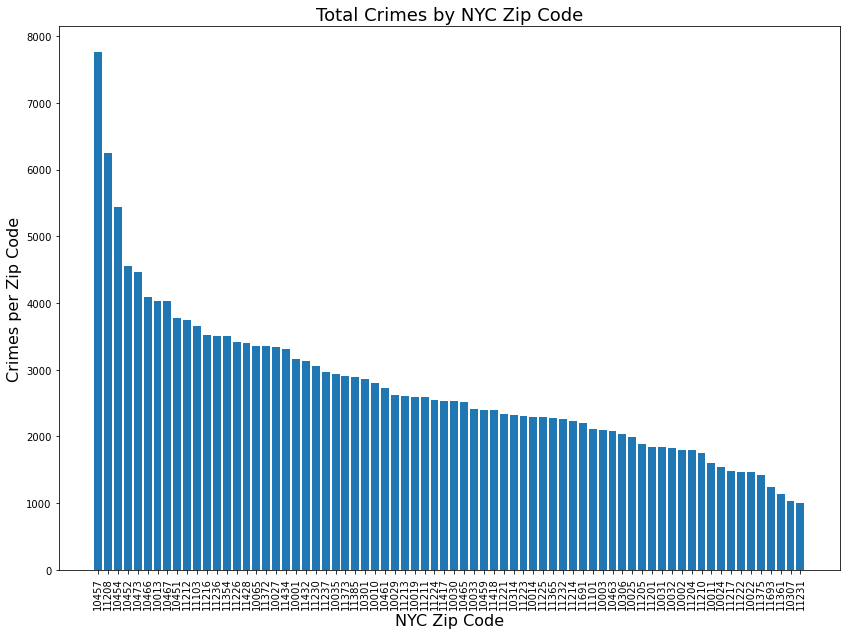

In [53]:
# Plot total crimes by Zip Code:
plt.figure(figsize = (14, 10))
x_axis=np.arange(len(zips))
plt.bar(x_axis, total_zip_crimes)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, zips, fontsize = 10, rotation = 90)
plt.title("Total Crimes by NYC Zip Code", fontsize = 18)
plt.xlabel("NYC Zip Code", fontsize = 16)
plt.ylabel("Crimes per Zip Code", fontsize = 16)
plt.show()



# Plot total crimes by borough:
#plt.figure(figsize = (10, 8))
#x_axis=np.arange(len(boroughs))
#plt.bar(x_axis, total_borough_crimes, color=['black', 'red', 'green', 'blue', 'cyan'])
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, boroughs, fontsize = 13)
#plt.title("Total Crimes by NYC Borough", fontsize = 18)
#plt.xlabel("NYC Borough", fontsize = 16)
#plt.ylabel("Crimes per Borough", fontsize = 16)
#plt.show()

In [87]:
# Sort crimes per zip code by type, and count them:
# Used sort_index to keep the zip codes in order, instead of sorting by value_counts,
# which had made the chart below just show all counts in descending order, not tied to the zip code.

#violations = cleaning_df.Zip[cleaning_df.Category == 'VIOLATION'].value_counts().sort_index()
#misdemeanors = cleaning_df.Zip[cleaning_df.Category == 'MISDEMEANOR'].value_counts().sort_index()
#felonies = cleaning_df.Zip[cleaning_df.Category == 'FELONY'].value_counts().sort_index()



In [88]:
#violations

In [89]:
#misdemeanors

In [90]:
#felonies

In [65]:
# Read Cory's RetailerByPop file, for merging:

retailer_file = "Resources/RetailersByPop.csv"
retailer_df = pd.read_csv(retailer_file)
retailer_df.head()

,City,Borough,Neighborhood,Zip,Lotto Retailers,Population,Retailer per 100k
0,New York,Bronx,Central Bronx,10453,56.0,79606.0,70.346456
1,New York,Bronx,Central Bronx,10457,65.0,74554.0,87.185128
2,New York,Bronx,Central Bronx,10460,42.0,59505.0,70.582304
3,New York,Bronx,Bronx Park and Fordham,10458,55.0,83960.0,65.507384
4,New York,Bronx,Bronx Park and Fordham,10467,55.0,103732.0,53.021247


In [66]:
# Merge the two dataframes:

raw_merge = pd.merge(cleaning_df, retailer_df, on="Zip", how = "left")
raw_merge.head()

,Precinct,Complaint Number,Borough_x,Category,Zip,City,Borough_y,Neighborhood,Lotto Retailers,Population,Retailer per 100k
0,75,237202728,BROOKLYN,FELONY,11208,New York,Brooklyn,East New York and New Lots,64.0,98660.0,64.869248
1,13,989134472,MANHATTAN,FELONY,10010,New York,Manhattan,Gramercy Park and Murray Hill,23.0,33730.0,68.188556
2,1,681808925,MANHATTAN,FELONY,10013,New York,Manhattan,Greenwich Village and Soho,65.0,28709.0,226.409837
3,73,170101826,BROOKLYN,MISDEMEANOR,11212,New York,Brooklyn,Central Brooklyn,76.0,76527.0,99.311354
4,103,817418587,QUEENS,MISDEMEANOR,11432,New York,Queens,Jamaica,55.0,62053.0,88.633910


In [78]:
# Drop unneeded columns:

merged_df = pd.DataFrame(raw_merge[["Precinct", "Borough_x", "Category", "Zip", "Lotto Retailers", "Population", "Retailer per 100k" ]])
merged_df.head(10)

,Precinct,Borough_x,Category,Zip,Lotto Retailers,Population,Retailer per 100k
0,75,BROOKLYN,FELONY,11208,64.0,98660.0,64.869248
1,13,MANHATTAN,FELONY,10010,23.0,33730.0,68.188556
2,1,MANHATTAN,FELONY,10013,65.0,28709.0,226.409837
3,73,BROOKLYN,MISDEMEANOR,11212,76.0,76527.0,99.311354
4,103,QUEENS,MISDEMEANOR,11432,55.0,62053.0,88.633910
5,113,QUEENS,MISDEMEANOR,11434,49.0,65791.0,74.478272
6,109,QUEENS,FELONY,11354,57.0,55200.0,103.260870
7,73,BROOKLYN,VIOLATION,11212,76.0,76527.0,99.311354
8,40,BRONX,MISDEMEANOR,10454,33.0,38203.0,86.380651
9,61,BROOKLYN,MISDEMEANOR,11223,70.0,81789.0,85.586081


In [79]:
len(merged_df)

196658

In [176]:
# Count up violations, misdemeanors, and felonies per zip code in merged dataframe:

violations = pd.DataFrame(merged_df.Zip[merged_df.Category == 'VIOLATION'].value_counts().sort_index())
misdemeanors = pd.DataFrame(merged_df.Zip[merged_df.Category == 'MISDEMEANOR'].value_counts().sort_index())
felonies = pd.DataFrame(merged_df.Zip[merged_df.Category == 'FELONY'].value_counts().sort_index())

In [177]:
violations.head()

,Zip
10001,281
10002,271
10003,304
10010,374
10011,210


In [178]:
violations.reset_index(drop = False, inplace=True)
violations.head()

,index,Zip
0,10001,281
1,10002,271
2,10003,304
3,10010,374
4,10011,210


In [179]:
violations = violations.rename(columns = {"index": "Zip", "Zip": "Violations"})
violations.head()

,Zip,Violations
0,10001,281
1,10002,271
2,10003,304
3,10010,374
4,10011,210


In [180]:
violation_merge = pd.merge(violations, retailer_df, on="Zip", how = "left")
violation_merge.head(10)

,Zip,Violations,City,Borough,Neighborhood,Lotto Retailers,Population,Retailer per 100k
0,10001,281,New York,Manhattan,Chelsea and Clinton,47.0,22924.0,205.025301
1,10002,271,New York,Manhattan,Lower East Side,59.0,74993.0,78.674010
2,10003,304,New York,Manhattan,Lower East Side,38.0,54682.0,69.492703
3,10010,374,New York,Manhattan,Gramercy Park and Murray Hill,23.0,33730.0,68.188556
4,10011,210,New York,Manhattan,Chelsea and Clinton,30.0,50472.0,59.438897
5,10013,472,New York,Manhattan,Greenwich Village and Soho,65.0,28709.0,226.409837
6,10014,229,New York,Manhattan,Greenwich Village and Soho,17.0,30738.0,55.306136
7,10019,328,New York,Manhattan,Chelsea and Clinton,39.0,43703.0,89.238725
8,10022,194,New York,Manhattan,Gramercy Park and Murray Hill,31.0,31125.0,99.598394
9,10024,215,New York,Manhattan,Upper West Side,21.0,59001.0,35.592617


In [181]:
len(violation_merge)

72

 The correlation coefficient between violations and lottery retailers is 0.09
 The r-squared is: 0.008712529962659454


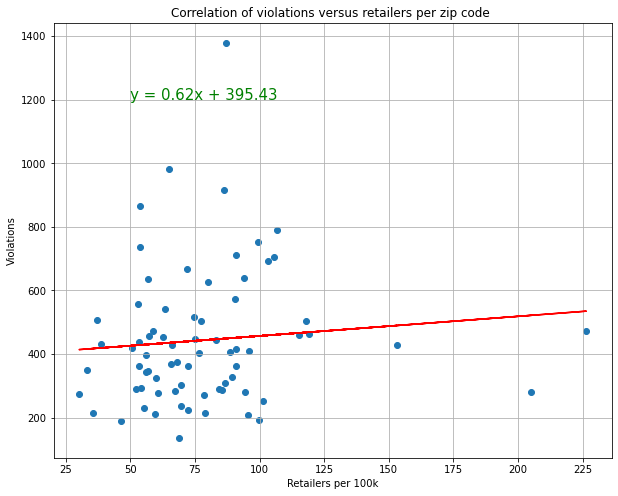

In [192]:
violations_per_zip = violation_merge["Violations"]
retailers_per_zip = violation_merge["Retailer per 100k"]

plt.figure(figsize = (10, 8))
x_values = retailers_per_zip
y_values = violations_per_zip
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 1200),fontsize=15,color="green")
plt.title("Correlation of violations versus retailers per zip code ")
plt.xlabel('Retailers per 100k')
plt.ylabel('Violations')
print(f" The correlation coefficient between violations and lottery retailers is {round(st.pearsonr(retailers_per_zip, violations_per_zip)[0],2)}")
print(f" The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

In [183]:
misdemeanors.head()

,Zip
10001,1714
10002,981
10003,1105
10010,1424
10011,794


In [184]:
misdemeanors.reset_index(drop = False, inplace=True)
misdemeanors.head()

,index,Zip
0,10001,1714
1,10002,981
2,10003,1105
3,10010,1424
4,10011,794


In [185]:
misdemeanors = misdemeanors.rename(columns = {"index": "Zip", "Zip": "Misdemeanors"})
misdemeanors.head()

,Zip,Misdemeanors
0,10001,1714
1,10002,981
2,10003,1105
3,10010,1424
4,10011,794


In [188]:
misdemeanor_merge = pd.merge(misdemeanors, retailer_df, on="Zip", how = "left")
misdemeanor_merge.head(10)

,Zip,Misdemeanors,City,Borough,Neighborhood,Lotto Retailers,Population,Retailer per 100k
0,10001,1714,New York,Manhattan,Chelsea and Clinton,47.0,22924.0,205.025301
1,10002,981,New York,Manhattan,Lower East Side,59.0,74993.0,78.674010
2,10003,1105,New York,Manhattan,Lower East Side,38.0,54682.0,69.492703
3,10010,1424,New York,Manhattan,Gramercy Park and Murray Hill,23.0,33730.0,68.188556
4,10011,794,New York,Manhattan,Chelsea and Clinton,30.0,50472.0,59.438897
5,10013,2217,New York,Manhattan,Greenwich Village and Soho,65.0,28709.0,226.409837
6,10014,1203,New York,Manhattan,Greenwich Village and Soho,17.0,30738.0,55.306136
7,10019,1293,New York,Manhattan,Chelsea and Clinton,39.0,43703.0,89.238725
8,10022,775,New York,Manhattan,Gramercy Park and Murray Hill,31.0,31125.0,99.598394
9,10024,879,New York,Manhattan,Upper West Side,21.0,59001.0,35.592617


In [189]:
len(misdemeanor_merge)

72

 The correlation coefficient between misdemeanors and lottery retailers is 0.18
 The r-squared is: 0.03236934689135186


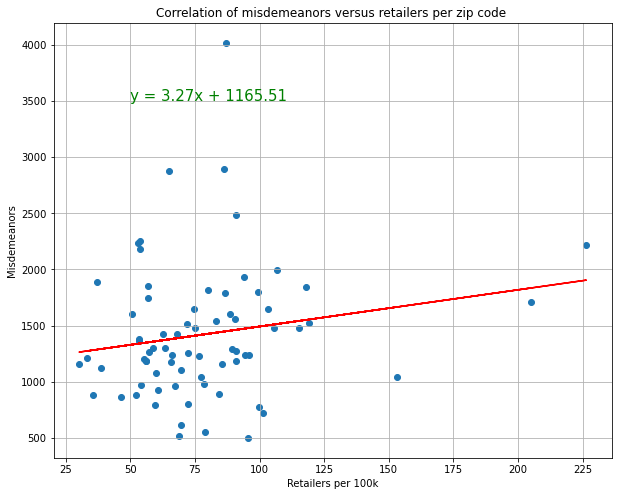

In [193]:
misdemeanors_per_zip = misdemeanor_merge["Misdemeanors"]
retailers_per_zip = misdemeanor_merge["Retailer per 100k"]

plt.figure(figsize = (10, 8))
x_values = retailers_per_zip
y_values = misdemeanors_per_zip
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 3500),fontsize=15,color="green")
plt.title("Correlation of misdemeanors versus retailers per zip code ")
plt.xlabel('Retailers per 100k')
plt.ylabel('Misdemeanors')
print(f" The correlation coefficient between misdemeanors and lottery retailers is {round(st.pearsonr(retailers_per_zip, misdemeanors_per_zip)[0],2)}")
print(f" The r-squared is: {rvalue**2}")
plt.grid(True)
plt.show()

In [174]:
felonies

,Zip
10001,1168
10002,547
10003,689
10010,1004
10011,599
...,...
11428,1227
11432,1127
11434,1138
11691,652


In [57]:
# NYC populations per borough.  Source: census.gov, https://tinyurl.com/ybmwj89r:

# Bronx          1418207
# Brooklyn       2559903
# Manhattan      1628706
# Queens         2253858
# Staten Island   476143

In [58]:
# Calculate crime rate for violations:

#violations_df = pd.DataFrame(violations)
#populations = [1418207, 2559903, 1628706, 2253858, 476143]
#violations_df["Population"]=populations
#violations_df = violations_df.rename(columns = {"Borough": "Violations"})
#violations_df["Rate"]=(violations_df["Violations"] / violations_df["Population"] * 100000).round(2)
#violations_df

In [59]:
#misdemeanors

In [60]:
# Calculate crime rate for misdemeanors:

#misdemeanors_df = pd.DataFrame(misdemeanors)
#populations = [1418207, 2559903, 1628706, 2253858, 476143]
#misdemeanors_df["Population"]=populations
#misdemeanors_df = misdemeanors_df.rename(columns = {"Borough": "Misdemeanors"})
#misdemeanors_df["Rate"]=(misdemeanors_df["Misdemeanors"] / misdemeanors_df["Population"] * 100000).round(2)
#misdemeanors_df

In [61]:
#felonies

In [62]:
# Calculate crime rate for felonies:

#felonies_df = pd.DataFrame(felonies)
#populations = [1418207, 2559903, 1628706, 2253858, 476143]
#felonies_df["Population"]=populations
#felonies_df = felonies_df.rename(columns = {"Borough": "Felonies"})
#felonies_df["Rate"]=(felonies_df["Felonies"] / felonies_df["Population"] * 100000).round(2)
#felonies_df

In [63]:
# Create a Grouped Bar Chart for total crime:
#
#barWidth = 0.25
#
## Use counts from above:
#bar1 = violations
#bar2 = misdemeanors
#bar3 = felonies
#
## Set position of bar on X axis
#r1 = np.arange(len(bar1))
#r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
#
## Format:
#plt.figure(figsize = (10, 8))
#plt.bar(r1, bar1, color='g', width=barWidth, edgecolor='white', label='Violations')
#plt.bar(r2, bar2, color='y', width=barWidth, edgecolor='white', label='Misdemeanors')
#plt.bar(r3, bar3, color='r', width=barWidth, edgecolor='white', label='Felonies')
#plt.xticks(np.arange(6), ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"), fontsize = 13)
#plt.title("Total Crime Across the NYC Boroughs by Type", fontsize = 18)
#plt.xlabel("NYC Borough", fontsize = 16)
#plt.ylabel("Number of crimes", fontsize = 16)
#plt.legend()

In [64]:
# Create a Grouped Bar Chart for crime rate:
#barWidth = 0.25
#
## Use counts from above:
#rate1 = violations_df["Rate"]
#rate2 = misdemeanors_df["Rate"]
#rate3 = felonies_df["Rate"]
#
## Set position of bar on X axis
#r1 = np.arange(len(rate1))
#r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
#
## Format:
#plt.figure(figsize = (10, 8))
#plt.bar(r1, rate1, color='g', width=barWidth, edgecolor='white', label='Violations')
#plt.bar(r2, rate2, color='y', width=barWidth, edgecolor='white', label='Misdemeanors')
#plt.bar(r3, rate3, color='r', width=barWidth, edgecolor='white', label='Felonies')
#plt.xticks(np.arange(6), ("Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"), fontsize = 13)
#plt.title("Crime Rate Across the NYC Boroughs by Type", fontsize = 18)
#plt.xlabel("NYC Borough", fontsize = 16)
#plt.ylabel("Crimes per 100,000 People", fontsize = 16)
#plt.legend()

In [ ]:
# Number of each type of crime per borough:
#borough_crime_counts = pd.DataFrame(cleaning_df.groupby(["Borough"])["Category"].value_counts())
#borough_crime_counts